<a href="https://colab.research.google.com/github/prasa12/MyPython-Stuff/blob/master/Pytorch/01_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Lets explore Pytorch end to end workflow

In [ ]:
what_were_covering = {1:"data(prepare and load)",
                      2: "Build Model",
                      3: "Making predictions and evaluating a model(inference)",
                      4: "Save and loading the Model",
                      5: "Putting all together"}

what_were_covering

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check Pytorch versio
torch.__version__

'2.8.0+cu126'

from typing import Text
## 1. Data (preparing and loading)

Data can be almost anything in machine learning

* Excel Spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

Machine is a game of 2 parts
1. Get data into numerical representation
2. Build a model to learn patterns in the Numerical representation

We will use a linear regression formula to make a straight line with known **parameters**

In [5]:
# Create Known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start,end, step).unsqueeze(dim=1)
y = weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
len(X),len(y)

(50, 50)

In [8]:
## Splitting the data into training and testing sets

# Create a train/test split
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

/tmp/ipython-input-3514754785.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop={"size": 14});


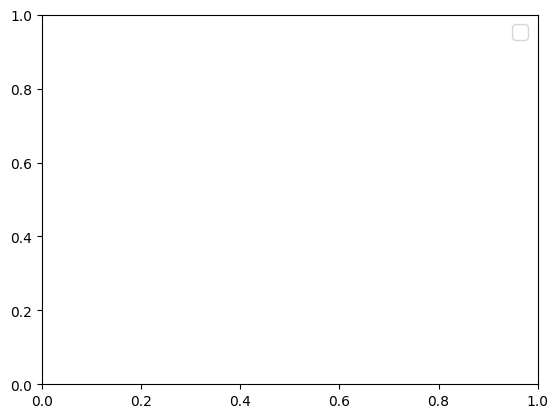

In [13]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compare predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data,test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    #Plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

plt.legend(prop={"size": 14});

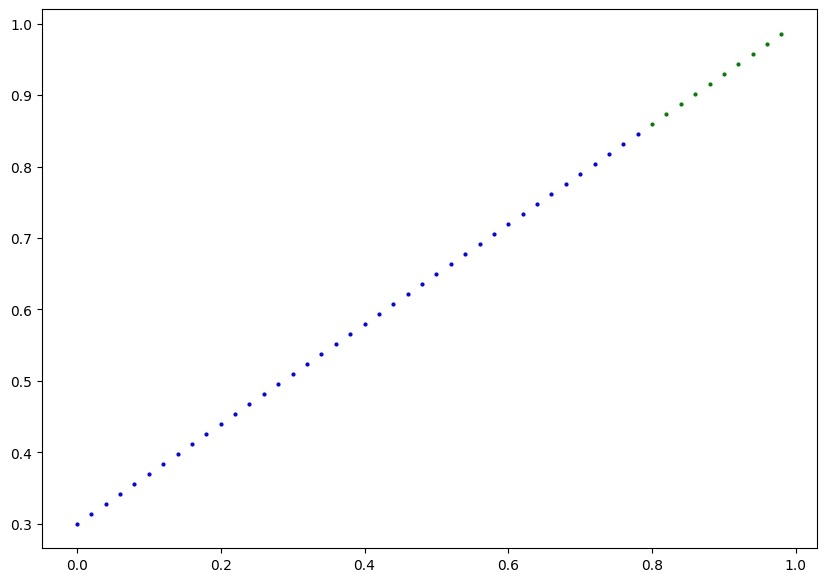

In [14]:
plot_predictions()